# Installation of Packages in Conda

To install the required packages in your conda environment, you can use the following commands:

```bash
conda install h5py
conda install pytables


In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(project_root)

from examples.mia.LOS.utils.data_processing import get_mimic_dataset, get_mimic_dataloaders
from examples.mia.LOS.utils.model import MimicLR, create_trained_model_and_metadata


In [3]:
# Generate the dataset and dataloaders
path = os.path.join(os.getcwd(), "data/")
flatten = True
dataset, train_indices, validation_indices, test_indices, early_stop_indices = get_mimic_dataset(path, train_frac = 0.5,
                                                                            test_frac= 0.2,
                                                                            validation_frac=0,
                                                                            early_stop_frac=0,
                                                                            flatten= flatten)

/home/fazeleh/LeakPro/examples/mia/LOS/utils/data_processing.py:262: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  df_out.loc[:,idx[:,'mean']] = df_out.loc[:,idx[:,'mean']].groupby(ID_COLS).fillna(
/home/fazeleh/LeakPro/examples/mia/LOS/utils/data_processing.py:262: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_out.loc[:,idx[:,'mean']] = df_out.loc[:,idx[:,'mean']].groupby(ID_COLS).fillna(
/home/fazeleh/LeakPro/examples/mia/LOS/utils/data_processing.py:264: FutureWarning: DataFrameGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use DataFrame.fillna instead
  ).groupby(ID_

Saved dataset to /home/fazeleh/LeakPro/examples/mia/LOS/data/dataset.pkl
Saved train and test indices to /home/fazeleh/LeakPro/examples/mia/LOS/data/indices.pkl


In [4]:
train_loader, validation_loader, test_loader, early_stop_loader = get_mimic_dataloaders(dataset,
                          train_indices,
                          validation_indices,
                          test_indices,
                          early_stop_indices,
                          batch_size=128)

In [5]:
n_features = dataset.x.shape[1]
print(f"Number of features: {n_features}")

# Train the model
if not os.path.exists("target"):
    os.makedirs("target")
model = MimicLR(n_features)
train_acc, train_loss, test_acc, test_loss = create_trained_model_and_metadata(model, 
                                                                               train_loader, 
                                                                               test_loader, 
                                                                               lr = 0.0001,
                                                                                weight_decay = 5.392,
                                                                               epochs=5)

Number of features: 7488


Training Progress: 100%|██████████| 5/5 [00:04<00:00,  1.04it/s]


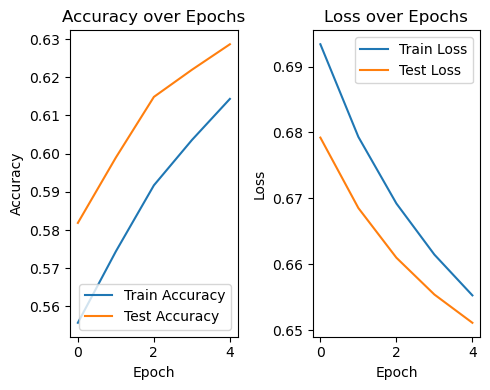

In [6]:
import matplotlib.pyplot as plt

# Plot training and test accuracy
plt.figure(figsize=(5, 4))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Plot training and test loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
from mimic_handler import MimicInputHandler

from leakpro import LeakPro

# Read the config file
config_path = "audit.yaml"

# Prepare leakpro object
leakpro = LeakPro(MimicInputHandler, config_path)

# Run the audit 
leakpro.run_audit()

2024-12-10 11:59:56,919 INFO     Target model blueprint created from MimicLR in utils/model.py.


FileNotFoundError: Could not find the target model metadata at ./target/model_metadata.pkl